# Import Libraries & Dataset Overview

In [41]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('BAJFINANCE.csv')
df = df.set_index('Date')
df.index.freq = 'D'
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [36]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840
2020-08-28,BAJFINANCE,EQ,3632.50,3650.00,3688.00,3617.05,3672.05,3670.80,3652.77,4251575,1.553003e+15,137033.0,434147.0,0.1021
2020-08-31,BAJFINANCE,EQ,3670.80,3715.00,3749.85,3465.00,3478.50,3487.80,3602.93,8529788,3.073224e+15,293454.0,1321559.0,0.1549


In [42]:
print(f'Min date : {df.index.min()} and max date : {df.index.max()} ')

Min date : 2000-01-03 and max date : 2020-08-31 


In [57]:
df.shape

(4624, 13)

In [43]:
# check missing values
df.isnull().sum()/len(df)*100

Symbol                 0.000000
Series                 0.000000
Prev Close             0.000000
Open                   0.000000
High                   0.000000
Low                    0.000000
Last                   0.000000
Close                  0.000000
VWAP                   0.000000
Volume                 0.000000
Turnover               0.000000
Trades                54.812623
Deliverable Volume     8.796844
%Deliverble            8.796844
dtype: float64

In [44]:
# drop feature that has >50% missing values
df.drop('Trades', axis=1, inplace=True)

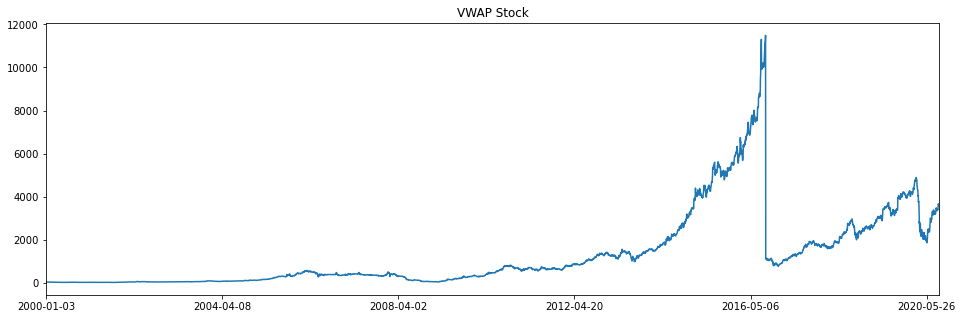

In [45]:
title='VWAP Stock'
ylabel=''
xlabel='' # we don't really need a label here

ax = df['VWAP'].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# Data Exploration and Pre processing

## Handling Missing Values

In [46]:
# check missing values
df.isnull().sum()

Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Deliverable Volume    446
%Deliverble           446
dtype: int64

In [47]:
# drop na
df = df.dropna()

In [48]:
# check missing values
df.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

## Decomposition

In [54]:
df.sort_index(inplace=True)

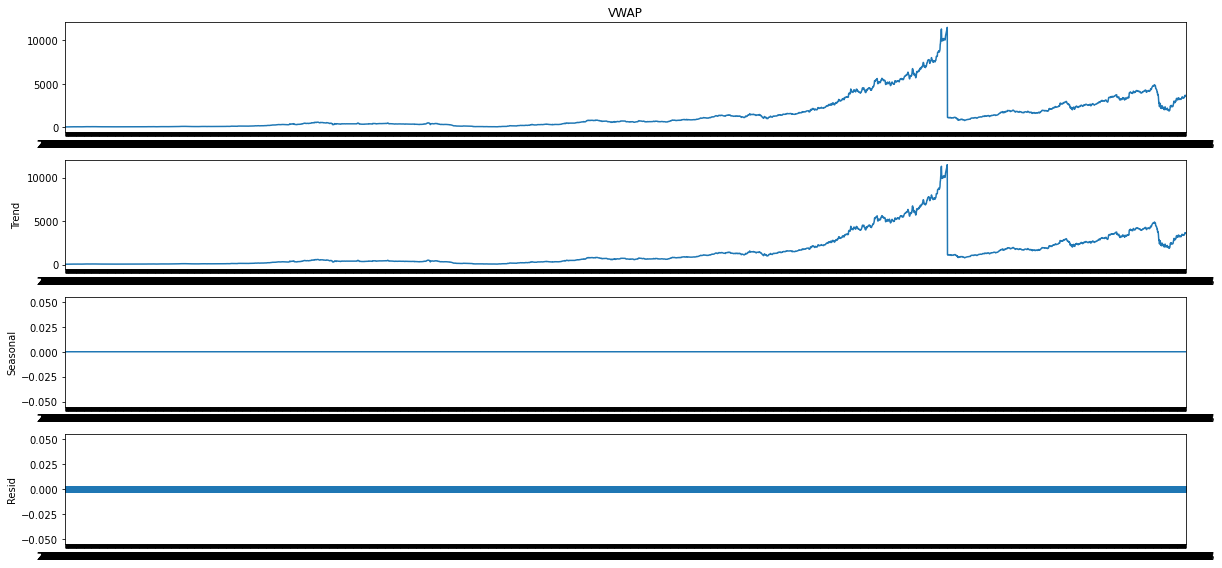

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['VWAP'], extrapolate_trend='freq', period=1)
plt.rcParams['figure.figsize'] = (17,8)
result.plot();

## Auto Arima Recomendation

In [61]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2002-01-01,BAJAUTOFIN,EQ,33.55,33.60,34.00,33.00,34.00,34.00,33.84,500,1.691750e+09,450.0,0.9000
2002-01-02,BAJAUTOFIN,EQ,34.00,34.85,34.85,33.85,34.20,34.20,33.97,1448,4.918660e+09,1348.0,0.9309
2002-01-03,BAJAUTOFIN,EQ,34.20,35.00,35.00,34.05,34.50,34.50,34.28,600,2.057000e+09,600.0,1.0000
2002-01-07,BAJAUTOFIN,EQ,34.50,34.05,35.00,34.05,34.25,34.25,34.24,145,4.965000e+08,145.0,1.0000
2002-01-08,BAJAUTOFIN,EQ,34.25,34.05,34.50,34.00,34.00,34.00,34.07,800,2.725500e+09,800.0,1.0000


In [64]:
features = ['Prev Close', 'Open', 'High', 'Low', 'Last', 
            'Close', 'Volume', 'Turnover', 'Deliverable Volume', '%Deliverble']

In [80]:
from pmdarima import auto_arima 

auto_arima(df['VWAP'], exogenous=df[features]).summary()

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4624
Model:               SARIMAX(3, 0, 2)   Log Likelihood              -16409.053
Date:                Sun, 24 Jul 2022   AIC                          32850.106
Time:                        01:13:15   BIC                          32953.130
Sample:                             0   HQIC                         32886.357
                               - 4624                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prev Close             0.0012   1.19e-28   9.74e+24      0.000       0.001       0.001
Open                  -0.0872    1.2e-28  -7.26e+26      0.000      -0.087      -0.087
High                   0.4483   1.25e-28   3.58e+27      0.000       0.448       0.448
Low                    0.4294   1.15e-28   3.72e+27      0.000       0.429       0.429
Last                  -0.1958   1.21e-28  -1.62e+27      0.000      -0.196      -0.196
Close                  0.4043    1.2e-28   3.36e+27      0.000       0.404       0.404
Volume             -7.813e-07   3.24e-25  -2.41e+18      0.000   -7.81e-07   -7.81e-07
Turnover            2.928e-15   9.72e-17     30.113      0.000    2.74e-15    3.12e-15
Deliverable Volume -5.901e-08   4.83e-26  -1.22e+18      0.000    -5.9e-08    -5.9e-08
%Deliverble           -0.1150   7.36e-33  -1.56e+31      0.000      -0.115      -0.115
ar.L1                 -0.1486   6.08e-32  -2.44e+30      0.000      -0.149      -0.149
ar.L2                 -0.3272   2.87e-32  -1.14e+31      0.000      -0.327      -0.327
ar.L3                 -0.0633   7.23e-32  -8.76e+29      0.000      -0.063      -0.063
ma.L1                  0.1811   6.03e-32      3e+30      0.000       0.181       0.181
ma.L2                  0.3320   4.37e-32   7.61e+30      0.000       0.332       0.332
sigma2                71.0625   3.59e-34   1.98e+35      0.000      71.062      71.062
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             99451.91
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              30.96   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.36e+50. Standard errors may be unstable.
"""

## Spliting Data Train and Test

In [66]:
len(df)

4624

In [83]:
train=df[:4000]
test=df[4000:]

# Modeling

In [84]:
model=auto_arima(y=train['VWAP'],exogenous=train[features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=28000.925, Time=5.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=28046.373, Time=2.61 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=28017.886, Time=2.63 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=28017.816, Time=4.30 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57221.916, Time=2.41 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=28021.627, Time=4.57 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=28052.630, Time=4.87 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=28002.071, Time=4.82 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=28135.796, Time=4.66 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=28019.723, Time=3.88 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=28027.313, Time=5.30 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=28003.881, Time=5.09 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=28059.040, Time=5.44 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=27999.175, Time=5.42 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=28019.910, Time=4.27 sec


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=28050.974, Time=4.04 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=28000.383, Time=4.31 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=28131.023, Time=4.52 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=28018.015, Time=3.40 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=28025.569, Time=4.22 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=28002.214, Time=4.05 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=28057.380, Time=4.63 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 94.760 seconds


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


## Fit Model

In [86]:
model.fit(train['VWAP'],train[features])

ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [87]:
forecast=model.predict(n_periods=len(test), exogenous=test[features])

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [88]:
test['Forecast_ARIMA']=forecast

/var/folders/v4/0_xjmlhs3g97b1210d3fl8y80000gn/T/ipykernel_12782/760419411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Forecast_ARIMA']=forecast


<AxesSubplot:xlabel='Date'>

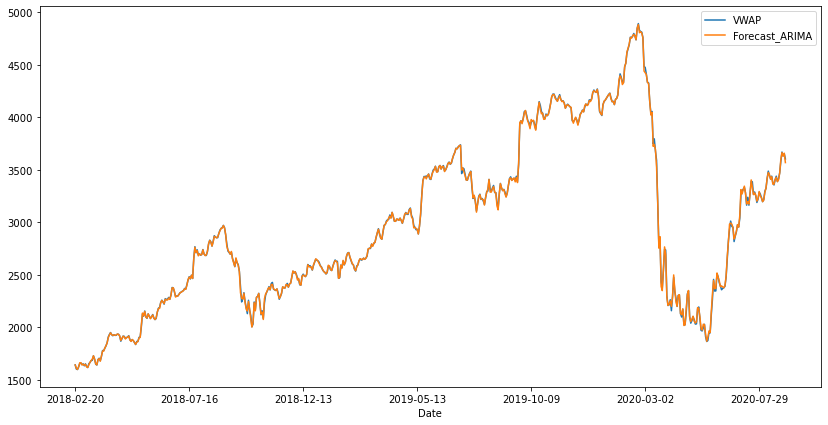

In [89]:
test[['VWAP','Forecast_ARIMA']].plot(figsize=(14,7))

## Evaluate the Model

In [90]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['VWAP'], forecast)
print(f'Forecast_ARIMA MSE Error: {error:11.10}')

Forecast_ARIMA MSE Error: 145.4271712


In [91]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['VWAP'], forecast)
print(f'Forecast_ARIMA RMSE Error: {error:11.10}')

Forecast_ARIMA RMSE Error: 12.05931885


# `Unfortunately we can't predict future VWAP without additional Exog rows, we need future Exog to do this`